In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal

In [6]:
original_image=mpimg.imread('E3_image.png')     

In [7]:
convolution_matrix = 1.0/256 * np.array([[1, 4, 6, 4, 1],
                                         [2, 8, 12, 8, 2],
                                         [6, 24, 36, 24, 6],
                                         [2, 8, 12, 8, 2],
                                         [1, 4, 6, 4, 1]])

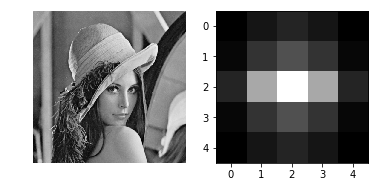

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')      
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(convolution_matrix, cmap='gray')
plt.savefig('E3_figure.png')

In [9]:
convolved_image = signal.convolve2d(original_image, convolution_matrix, mode='full')
convolved_image_fft2 = np.fft.fft2(convolved_image)

In [10]:
pad_original_image = np.pad(original_image, ((0, 4), (0,4)), 'constant');
pad_convolution_matrix = np.pad(convolution_matrix, ((0, 511), (0, 511)), 'constant');

In [11]:
pad_original_image_fft2 = np.fft.fft2(pad_original_image)
pad_convolution_matrix_fft2 = np.fft.fft2(pad_convolution_matrix)

In [12]:
pad_original_image_fft2.shape

(516, 516)

In [13]:
pad_convolution_matrix_fft2.shape

(516, 516)

In [14]:
multiplied_image = np.multiply(pad_original_image_fft2, pad_convolution_matrix_fft2)

In [15]:
inversed_image = np.fft.ifft2(multiplied_image);

In [16]:
mse1=(np.abs(convolved_image_fft2-multiplied_image) ** 2).mean()
mse2=(np.abs(convolved_image-inversed_image) ** 2 ).mean()
print('difference between convolved_image_fft2 and multiplied_image', mse1)
print('difference between convolved_image and inversed_image', mse2)

difference between convolved_image_fft2 and multiplied_image 7.91481301239e-25
difference between convolved_image and inversed_image 8.50963543153e-31
